#GP Noise 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math as mt
import pandas as pd
import seaborn as sb

from pandas import HDFStore
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.lpf_ww import LPFunction as LPFW
from src.lpf_wr import LPFunction as LPFR

from src.core import *

GP Parameters in lpf_wr:                                                                                                         
self.priors.append(UP(1e-5,1e-2, 'gp_std'))       (originally 1e-5,1e^-3)                                                     
self.priors.append(UP(  -5,   6, 'gp_log_inv_length'))

In [8]:
pe = pd.Panel(dict(rm = pd.read_hdf('results/pe.h5','bb/rn_masked4')))

##Histograms for gp_std and gp_log_inv_length

2500 mcmc iterations for rm

In [9]:
chains = array(pe.rm.get('tc p rho b k2 e c x u v'.split()).dropna())

In [10]:
chains2 = array(pe.rm.get('gp_std gp_log_inv_length'.split()).dropna()).T

(array([ 103.,  253.,  247.,  259.,  249.,  256.,  223.,  219.,  217.,
         235.,  204.,  213.,  190.,  166.,  170.,  164.,  151.,  182.,
         154.,  145.]),
 array([ 0.00083667,  0.00129481,  0.00175295,  0.00221109,  0.00266923,
         0.00312737,  0.00358552,  0.00404366,  0.0045018 ,  0.00495994,
         0.00541808,  0.00587622,  0.00633436,  0.00679251,  0.00725065,
         0.00770879,  0.00816693,  0.00862507,  0.00908321,  0.00954135,
         0.0099995 ]),
 <a list of 20 Patch objects>)

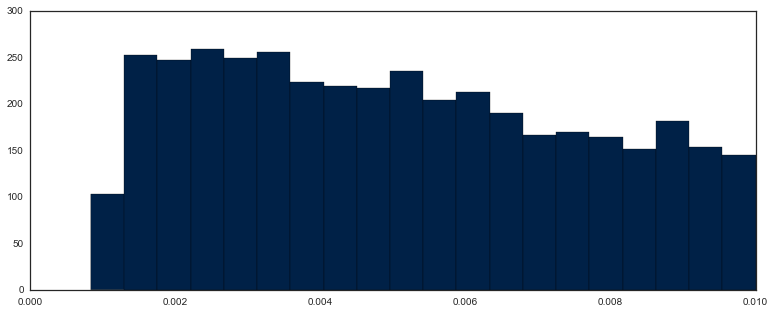

In [11]:
plt.hist(chains2[0,:], bins=20)

(array([  31.,  160.,  347.,  380.,  364.,  389.,  326.,  309.,  248.,
         229.,  235.,  197.,  182.,  155.,  126.,  102.,  101.,   67.,
          40.,   12.]),
 array([-1.27389602, -1.03720471, -0.80051341, -0.5638221 , -0.3271308 ,
        -0.0904395 ,  0.14625181,  0.38294311,  0.61963442,  0.85632572,
         1.09301703,  1.32970833,  1.56639963,  1.80309094,  2.03978224,
         2.27647355,  2.51316485,  2.74985616,  2.98654746,  3.22323876,
         3.45993007]),
 <a list of 20 Patch objects>)

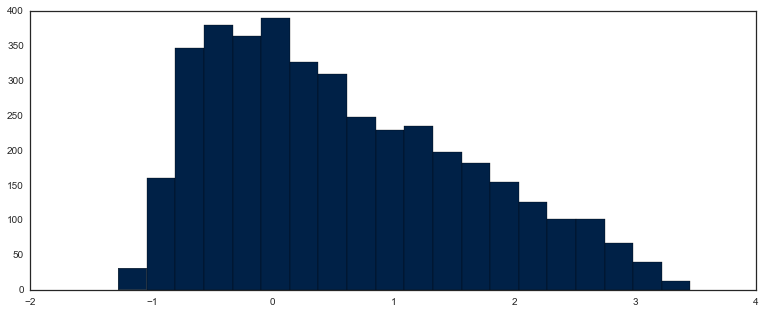

In [12]:
plt.hist(chains2[1,:], bins=20)

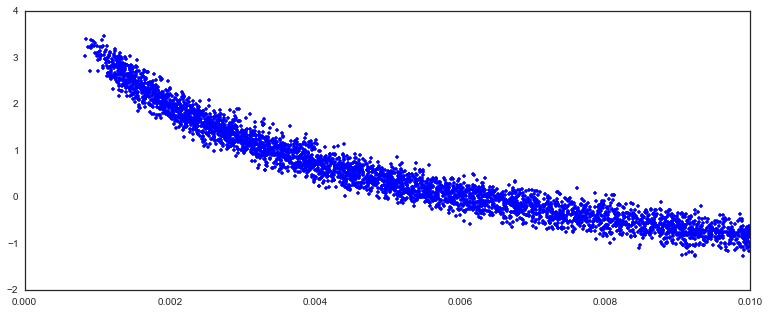

In [10]:
plt.plot(chains2[0,:],chains2[1,:],'b.')    #checking if thy're correlated
plt.show()

##Light Curves 

Most of the code comes from the exo_tutorials notebook

In [11]:
df_aux = pd.read_hdf('results/light_curves.h5', 'aux')
df_lc  = pd.read_hdf('results/light_curves.h5', 'final/bb_masked')
msk = array(df_aux.bad_mask, dtype=np.bool)

lpfw = LPFW(array(df_aux.mjd+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)
lpfr = LPFR(array(df_aux.mjd+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)

In [12]:
#Transit Model with residual extinction
flux_md = array([lpfw.compute_lc_model(pv) for pv in chains])
flux_mp = percentile(flux_md, [50,2.5,97.5], 0)

#Transit Model with zero airmass/residual extinction
#flux_mdnoam = array([lpfw.compute_lc_modelnoam(pv) for pv in chains])
#flux_mpnoam = percentile(flux_mdnoam, [50,2.5,97.5], 0)

#basline with residual extinction
flux_bd = array([lpfw.compute_baseline(pv) for pv in chains])
flux_bp = percentile(flux_bd, [50,2.5,97.5], 0)

In [13]:
time       = lpfw.time
flux_o     = lpfw.flux_o.ravel()
flux_m     = flux_mp[0,:]
residuals1  = flux_o - flux_m
#flux_m2     = flux_mpnoam[0,:]
#residuals2  = flux_o - flux_m2

###Transit Model with residual extinction

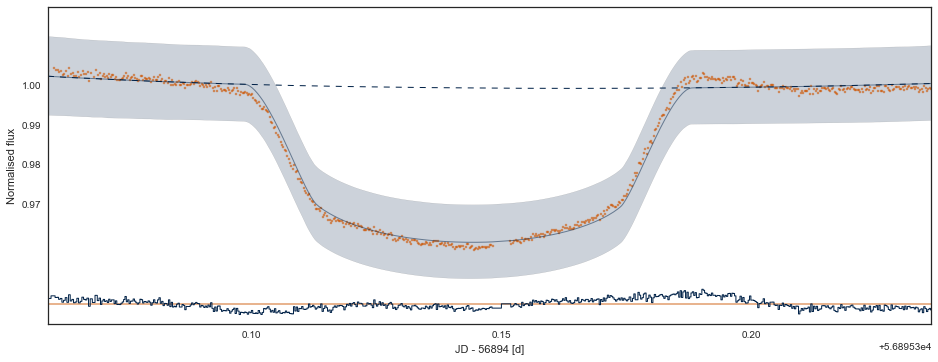

In [14]:
fig,ax = subplots(1,1)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.25, ms=5.5)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.5, ms=4.5, markeredgecolor=c_bo)
ax.fill_between(time, *flux_mp[1:,:], alpha=0.2)
ax.plot(time, flux_bp[0,:], '--', c=c_ob, lw=1)
ax.plot(time, flux_mp[0,:], '-', c=c_ob, alpha=0.5, lw=1)
ax.axhline(0.945+residuals1.mean(), ls='-', alpha=0.5, c=c_bo)
ax.plot(time, residuals1 + 0.945, '-', c=c_ob, drawstyle='steps-mid', lw=1)
setp(ax, xlim=time[[0,626]], ylabel='Normalised flux', xlabel='JD - {:d} [d]'.format(int(df_aux.mjd[0])), 
     yticks=[0.97,0.98,0.99,1.0])
fig.tight_layout()

In [15]:
flux_md.shape

(4000, 627)

Plotting all the mcmc results just to see what it looks like.

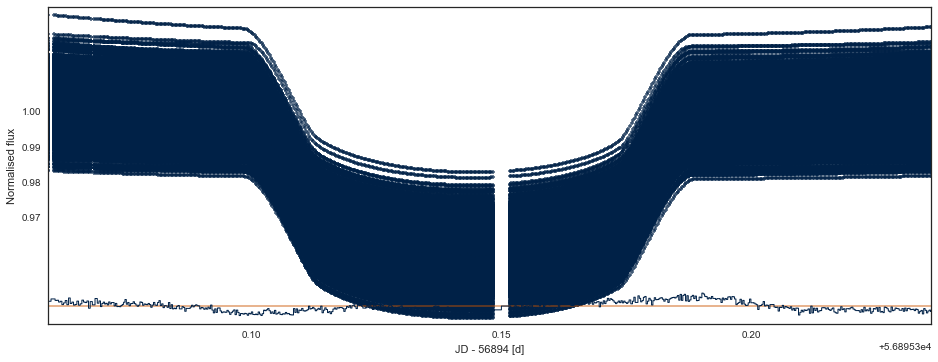

In [18]:
fig,ax = subplots(1,1)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.25, ms=5.5)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.5, ms=4.5, markeredgecolor=c_bo)
#ax.fill_between(time, flux_mp[1:,:], alpha=0.2)
#ax.plot(time, flux_bp[0,:], '--', c=c_ob, lw=1)
#ax.plot(time, flux_mp[0,:], '-', c=c_ob, alpha=0.5, lw=1)
ax.plot(array([time,]*4000), flux_md, '.', c=c_ob, alpha=0.75, lw=1)


ax.axhline(0.945+residuals1.mean(), ls='-', alpha=0.5, c=c_bo)
ax.plot(time, residuals1 + 0.945, '-', c=c_ob, drawstyle='steps-mid', lw=1)
setp(ax, xlim=time[[0,626]], ylabel='Normalised flux', xlabel='JD - {:d} [d]'.format(int(df_aux.mjd[0])), 
     yticks=[0.97,0.98,0.99,1.0])
fig.tight_layout()

In [19]:
r1=residuals1
#r2=residuals2
chainsT = chains.T
chains2 = array(pe.rm.get('gp_std gp_log_inv_length'.split()).dropna()).T

In [20]:
from george import GP
from george.kernels import ExpSquaredKernel, ExpKernel

In [21]:
gp = GP(ExpKernel(1))
gp.kernel = median(chains2[0])**2*ExpKernel(1./10**median(chains2[1]))
gp.compute(time, median(chainsT[5]))
mu1,cov1=gp.predict(r1,time)
error1=sqrt(diag(cov1))
#mu2,cov2=gp.predict(r2,time)
#error2=sqrt(diag(cov2))

###Residual Models

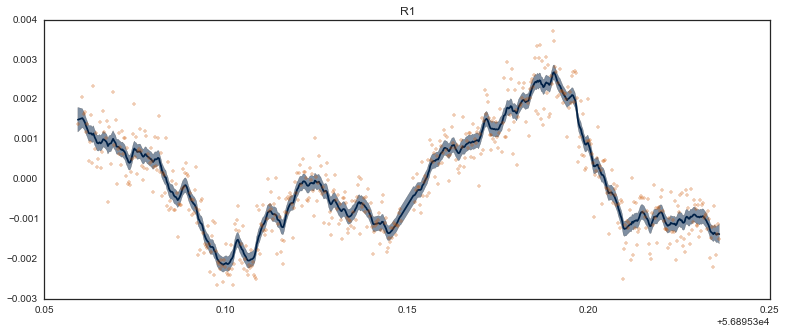

In [22]:
fig,ax = subplots(1,1)
ax.plot(time, mu1, '-', c=c_ob, alpha=1, ms=5.5)  #black: mean of predicted distribution
ax.fill_between(time,mu1-error1 ,mu1+error1 , alpha=0.5)  #grey: +- error on mu
ax.plot(time, r1 ,'.',c=c_bo, alpha=0.3) #orange: residuals 
ax.set_title('R1')

In [23]:
#fig,ax = subplots(1,1)
#ax.plot(time, mu2, '-', c=c_ob, alpha=1, ms=5.5)  #black: mean of predicted distribution
#ax.fill_between(time,mu2-error2 ,mu2+error2 , alpha=0.5)  #grey: +- error on mu
#ax.plot(time, r2 ,'.',c=c_bo, alpha=0.3) #orange: residuals 
#ax.set_title('R2')